In [1]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dataset = pd.read_csv('dataset_2019.csv')

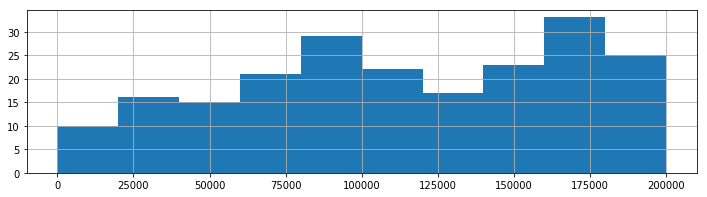

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,3))

#dataset.set_index('Unnamed: 0')['Ар2.0'].hist(ax=ax)
dataset['Ар1.0'].hist(range=(0, 200000))

In [5]:
dataset

,Unnamed: 0,Ар1.0,Ар2.0,Ар4.0,Ариск0,Кф,Лат,Овт,ПК0,ВР,target
0,101,7912846.0,173612.0,3923866.0,14208511.0,0.94,37652590.0,35472420.0,1577668.0,0.00,0
1,1016,424587.0,2882.0,235252.0,424587.0,1.00,531434.0,172354.0,182081.0,1450.51,0
2,1027,671637.0,26224.0,585485.0,1360872.0,1.02,1186467.0,774627.0,120846.0,0.00,0
3,1046,216102.0,30000.0,125410.0,216102.0,1.00,370476.0,240803.0,183761.0,0.00,0
4,1049,2405823.0,142729.0,4628940.0,2405823.0,0.99,3185612.0,3002388.0,240116.0,0.00,0
5,1052,310067.0,4436.0,544870.0,310067.0,1.00,443842.0,533472.0,88444.0,0.00,0
6,106,1311582.0,142921.0,959918.0,1311582.0,0.99,2815457.0,2302269.0,33290.0,1613.00,0
7,1068,1538356.0,102705.0,494028.0,1538356.0,1.00,2116742.0,789573.0,131459.0,0.00,1
8,1071,442951.0,2738.0,339085.0,442951.0,1.00,1067924.0,750920.0,423635.0,1164.08,0
9,1114,509498.0,813.0,524004.0,509498.0,1.00,532978.0,396699.0,120317.0,0.00,0


In [6]:
y = dataset['target']
X = dataset.iloc[:, 1:-1]

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, shuffle=True)

In [8]:
n = 1000 # кол-во решающих деревьев
depth =  5

In [9]:
estimator = xgb.XGBClassifier(n_estimators = n, depth = depth)

In [10]:
estimator.fit(X_train, y_train)

XGBClassifier(depth=5, n_estimators=1000)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score, classification_report

In [12]:
y_score = estimator.fit(X_train, y_train).predict(X_test)

In [13]:
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

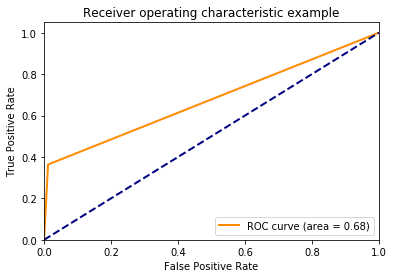

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       336
           1       0.50      0.36      0.42        11

    accuracy                           0.97       347
   macro avg       0.74      0.68      0.70       347
weighted avg       0.96      0.97      0.97       347



In [16]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.3)
X_rus, y_rus = rus.fit_sample(X, y)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_rus, y_rus, test_size=0.2, shuffle=True)

In [18]:
n = 1000 # кол-во решающих деревьев
depth =  5

In [19]:
estimator = xgb.XGBClassifier(n_estimators = n, depth = depth)

In [20]:
estimator.fit(X_train, y_train)

XGBClassifier(depth=5, n_estimators=1000)

In [21]:
#estimator.fit(X_rus, y_rus)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score, classification_report

In [23]:
y_score = estimator.fit(X_train, y_train).predict(X_test)

In [24]:
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

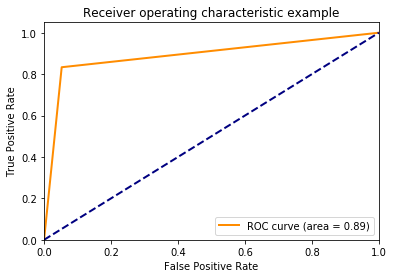

In [25]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

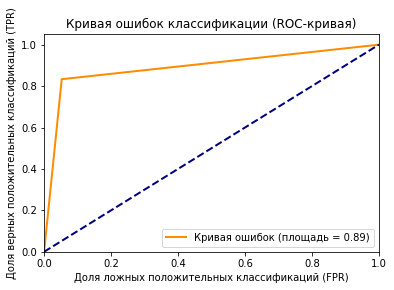

In [26]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Кривая ошибок (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных положительных классификаций (FPR)')
plt.ylabel('Доля верных положительных классификаций (TPR)')
plt.title('Кривая ошибок классификации (ROC-кривая)')
plt.legend(loc="lower right")
#plt.show()
savefig('real and test sorted by date.png', bbox_inches='tight', dpi=600)

In [27]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        57
           1       0.77      0.83      0.80        12

    accuracy                           0.93        69
   macro avg       0.87      0.89      0.88        69
weighted avg       0.93      0.93      0.93        69



In [28]:
for i, el in enumerate(y_test):
    print(el, y_score[i])

1 1
0 0
0 0
0 0
1 1
0 0
0 1
0 1
1 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 0


In [29]:
dataset_2020 = pd.read_csv('dataset_2020.csv')

In [30]:
y_2020 = dataset_2020['target']
X_2020 = dataset_2020.iloc[:, 1:-1]

In [31]:
y_score = estimator.predict(X_2020)

In [32]:
fpr, tpr, _ = roc_curve(y_2020.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

C:\Anaconda\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


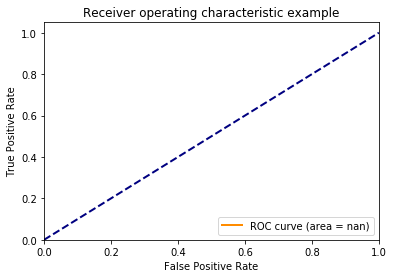

In [33]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
print(classification_report(y_2020, y_score))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1199
           1       0.00      0.00      0.00         0

    accuracy                           0.93      1199
   macro avg       0.50      0.46      0.48      1199
weighted avg       1.00      0.93      0.96      1199



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
y_score

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
unique, counts = numpy.unique(y_score, return_counts=True)

In [37]:
dict(zip(unique, counts))

{0: 1110, 1: 89}

In [38]:
res_dataset = dataset_2020.copy()

In [39]:
res_dataset['model_target'] = y_score

In [40]:
un = res_dataset[res_dataset['model_target'] == 1]['Unnamed: 0'].unique()

In [41]:
print(sorted(un))

[236, 438, 609, 695, 933, 1016, 1027, 1049, 1309, 1478, 1659, 1926, 1973, 2015, 2034, 2053, 2063, 2254, 2499, 2576, 2593, 2638, 2659, 2749, 2868, 2995, 3136, 3138, 3242, 3245, 3265, 3395, 3397, 3415, 3437, 3452, 3460, 3467, 3479, 3482, 3515, 3516, 3519]


In [42]:
print(len(un))

43


In [43]:
len(dataset_2020['Unnamed: 0'].unique())

325

In [45]:
len(dataset_2020[dataset_2020['target'] == 1]['Unnamed: 0'].unique())

0